# Data set -  911 Calls - https://www.kaggle.com/mchirico/montcoalert

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv') #csv file in current folder

In [3]:
df.head() # Seeing the Sample data of the csv

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info() # Getting info about the columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631963 entries, 0 to 631962
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        631963 non-null  float64
 1   lng        631963 non-null  float64
 2   desc       631963 non-null  object 
 3   zip        555090 non-null  float64
 4   title      631963 non-null  object 
 5   timeStamp  631963 non-null  object 
 6   twp        631692 non-null  object 
 7   addr       631963 non-null  object 
 8   e          631963 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.4+ MB


Top 5 zipcodes for 911 calls

In [5]:
df['zip'].value_counts().head()

19401.0    43134
19464.0    41605
19403.0    33135
19446.0    30686
19406.0    21419
Name: zip, dtype: int64

Plotting top 10 zipcodes count for 911 calls

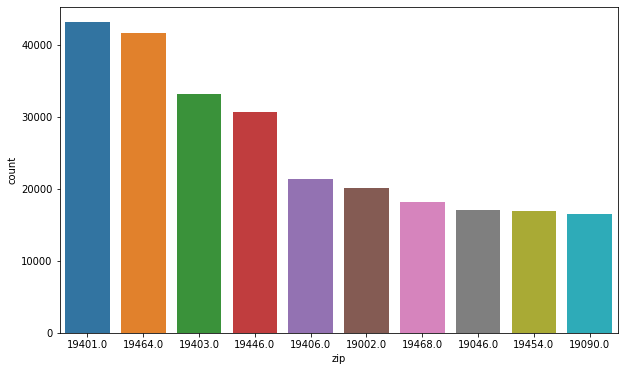

In [8]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['zip'],ax=ax,order=df['zip'].value_counts().head(10).index)

Top 5 townships for 911 calls

In [131]:
df['twp'].value_counts().head()

LOWER MERION    53133
ABINGTON        38103
NORRISTOWN      35534
UPPER MERION    34471
CHELTENHAM      29142
Name: twp, dtype: int64

Plotting top 5 count of calls based on townships

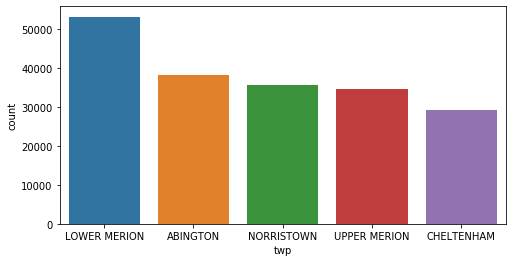

In [12]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['twp'],ax=ax,order=df['twp'].value_counts().head().index)

Unique titles for emergencies 

In [13]:
df['title'].nunique()

147

In the title coulumn, Reasons/Departments are specified by EMS, Fire or Traffic.
Creating a new column to track the reasoning of the 911 calls.

In [14]:
def getReason(x:str):
    if 'EMS' in x:
        return 'EMS'
    elif 'Traffic' in x:
        return 'Traffic'
    elif 'Fire' in x:
        return 'Fire'
df['Reason'] = df['title'].apply(getReason)

In [15]:
df.head() # checking the new column created - Reason

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


Most common reason for 991 calls

In [16]:
df['Reason'].value_counts()

EMS        315740
Traffic    221547
Fire        94676
Name: Reason, dtype: int64

EMS department handles the most emergencies and Fire is the least type of emergency - EMS is almost thrice as Fire
Plotting the same below

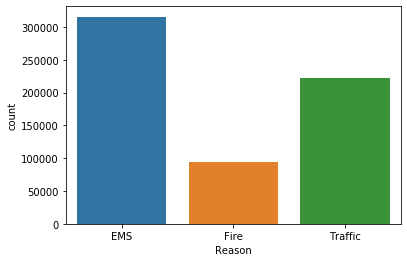

In [90]:
sns.countplot(df['Reason'])

In [15]:
df['timeStamp'].dtypes

dtype('O')

Getting the time and segregating based on hour, day of the week and Month

In [18]:
def getTime(timeStamp:str,kind:str):
    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    if kind == 'h':
        return pd.to_datetime(timeStamp).hour
    elif kind == 'w':
        return dmap[pd.to_datetime(timeStamp).weekday()]
    elif kind == 'm':
        return pd.to_datetime(timeStamp).month
    elif kind=='dt':
        return pd.to_datetime(timeStamp).date().strftime('%b %Y')

In [20]:
df['Day'] = df['timeStamp'].apply(lambda x:getTime(x,'w'))

In [22]:
df['Hour'] = df['timeStamp'].apply(lambda x:getTime(x,'h'))

In [24]:
df['Month'] = df['timeStamp'].apply(lambda x:getTime(x,'m'))

In [25]:
df.head() #cheking the columns added - 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu,14,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,16,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,16,12


Plotting the count/days of 911 calls and distinguishing by Reason

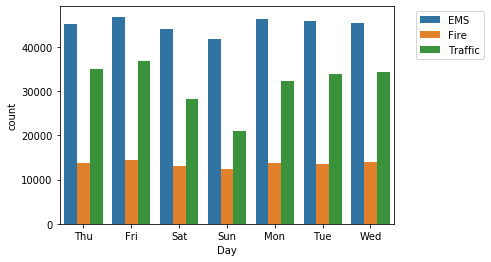

In [26]:
sns.countplot(x='Day',hue='Reason',data=df)
plt.legend(bbox_to_anchor=(1.05, 1)) #moving legend out of plot for better visibility

We can observe that EMS and Fire emergencies are almost similar everyday. However traffic emergencies are way lower on Sunday as it is a holiday for most workers.

Similarly now plotting count/month of 911 calls and distinguishing by Reason

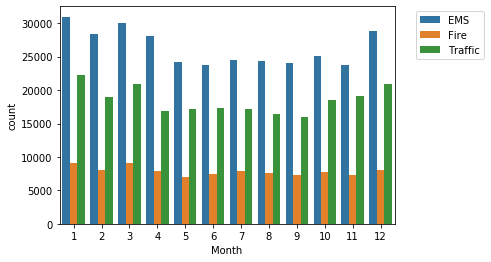

In [27]:
sns.countplot(x='Month',hue='Reason',data=df)
plt.legend(bbox_to_anchor=(1.05, 1)) #moving legend out of plot for better visibility

Getting month wise count for all emergency calls

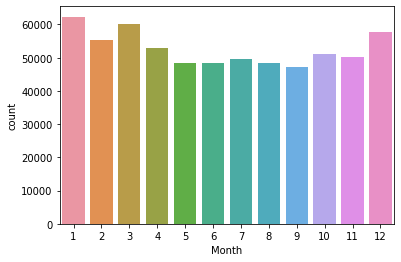

In [28]:
sns.countplot(x='Month',data=df)

In case if the the csv dosen't contain a specific month's data. Showing a line plot below for fill for missing months when required.

In [29]:
byMonth = df.groupby('Month').count()

In [30]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Hour
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,52956,52956,52956,46685,52956,52956,52940,52956,52956,52956,52956,52956
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467


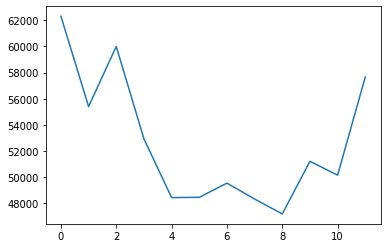

In [47]:
byMonth['twp'].plot()

Few emergency calls in the months of May - Spetember as compared to the rest of the year.

Plotting linear fit on the number of calls per month.

In [32]:
byMonth.reset_index(inplace=True) #making month as a column from index

In [33]:
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Hour
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,52956,52956,52956,46685,52956,52956,52940,52956,52956,52956,52956,52956
4,5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467


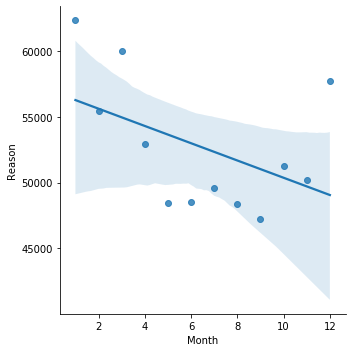

In [34]:
sns.lmplot(x='Month',y='Reason',data=byMonth)

Creating another column date to view the frequency of 911 calls by month

In [35]:
df['Date'] = df['timeStamp'].apply(lambda x:getTime(x,'dt'))

In [36]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Hour,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,17,12,Dec 2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,17,12,Dec 2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu,14,12,Dec 2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,16,12,Dec 2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,16,12,Dec 2015


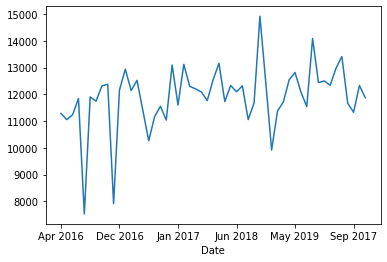

In [140]:
df.groupby('Date').count()['twp'].plot() # All emergencies by month Year

Now separately plotting 911 calls by Reason column created before

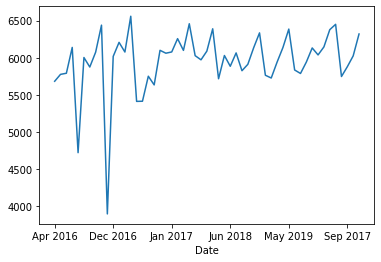

In [48]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot() # EMS emergencies by month Year

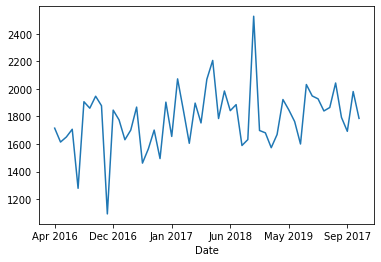

In [49]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot() # Fire emergencies by month Year

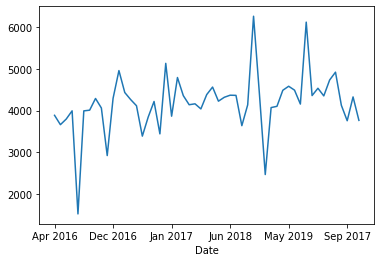

In [50]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot() # Trafiic emergencies by month Year

Modifying the structure of current dataframe in order to plot day/hour heatmap

In [76]:
byDayHour = df.groupby(by=['Day','Hour']).count()['Reason'].unstack(level=-1)

In [77]:
byDayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,1873,1540,1374,1242,1249,1558,2567,3999,4844,5036,...,6078,6705,6776,6817,5401,4809,4142,3692,3256,2714
Mon,1795,1483,1297,1208,1275,1750,2580,4292,5329,5499,...,5399,5906,6054,6155,5207,4275,3598,3096,2539,1970
Sat,2318,1958,1807,1517,1380,1501,1790,2389,3307,4138,...,5156,4931,4966,4951,4768,4543,3943,3706,3061,2826
Sun,2315,2052,1863,1534,1408,1400,1656,2296,2878,3563,...,4491,4254,4316,4299,4183,3967,3550,2984,2481,2206
Thu,1628,1324,1342,1172,1200,1685,2696,4293,5125,5145,...,5788,6168,6077,6655,5260,4466,3888,3331,2699,2248


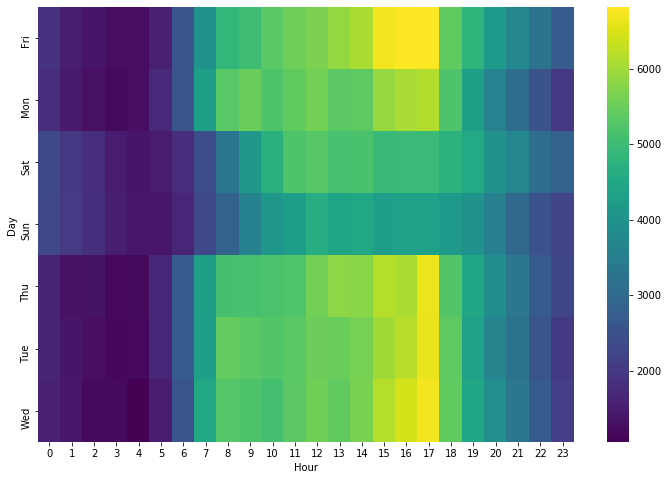

In [80]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(byDayHour,cmap='viridis',ax=ax)

Friday and Wednesday evenings having the highest number of 911 emergencies (4pm-5pm)

Plotting clustermap for better idea of similar data

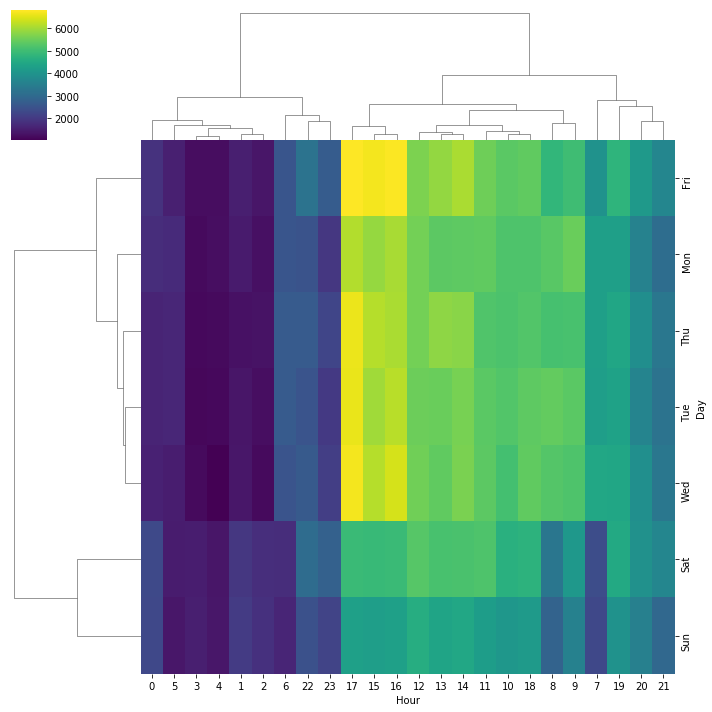

In [83]:
sns.clustermap(byDayHour,cmap='viridis')

Modifying the structure of current dataframe in order to plot day/hour heatmap

In [84]:
byDayMon = df.groupby(by=['Day','Month']).count()['Reason'].unstack(level=-1)

In [85]:
byDayMon.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
Fri,9309,8255,10941,7997,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,5410,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7332,7524,7850,6964,7508,6954,7482,8358,8151


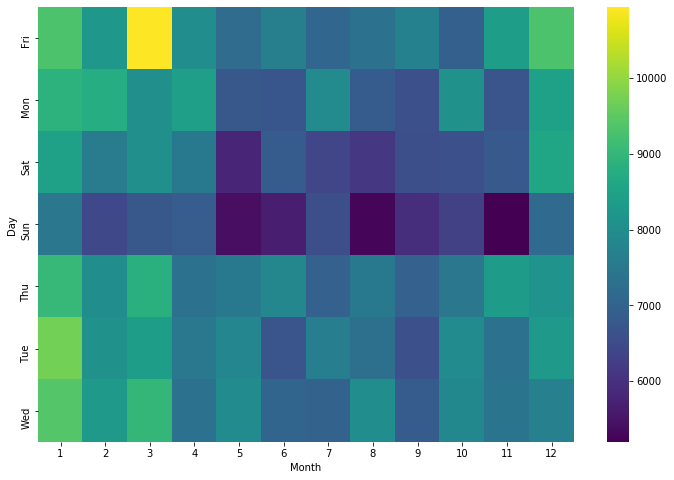

In [86]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(byDayMon,cmap='viridis',ax=ax)

Plotting clustermap for better idea of similar data

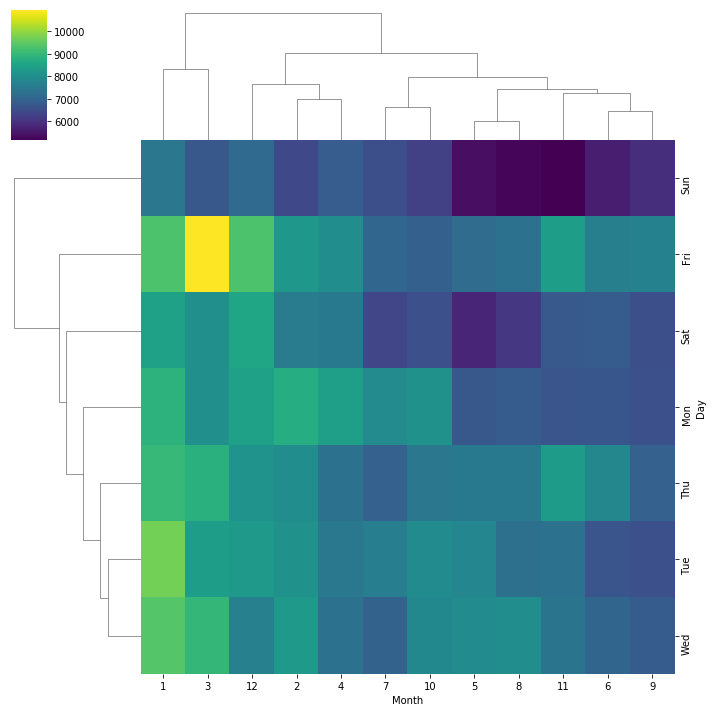

In [87]:
sns.clustermap(byDayMon,cmap='viridis')